In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

In [152]:
classes = ['OTHER', 'SWEEPING', 'VACUUMING', 'DUSTING', 'RUBBING', 'DOWNSTAIRS', 'WALKING', 'WALKING_FAST', 'UPSTAIRS_FAST', 'UPSTAIRS']

In [169]:
X = pd.read_csv('data/ankle/X_tr_01.csv').join(pd.read_csv('data/hip/X_tr_01.csv'), rsuffix='_hip')
Y = pd.read_csv('data/ankle/Y_tr_01.csv')
XY = X.merge(Y, left_index=True, right_index=True)
XY = XY[XY['label'] != 0]
XY = XY[XY['label'] != 8]
XY = XY[XY['label'] != 9]
XY = XY[XY['label'] != 11]
XY = XY[XY['label'] != 12]
X = XY.drop(columns = ['label'])
Y = XY['label']

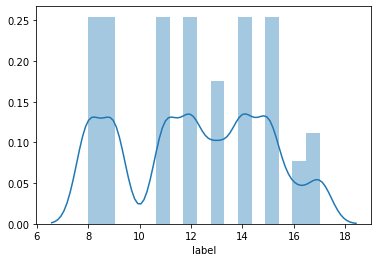

In [157]:
sns.distplot(Y)

In [170]:
X_test = pd.read_csv('data/ankle/X_ts_01.csv').join(pd.read_csv('data/hip/X_ts_01.csv'), rsuffix='_hip')
Y_test = pd.read_csv('data/ankle/Y_ts_01.csv')
XY_test = X_test.merge(Y_test, left_index=True, right_index=True)
XY_test = XY_test[XY_test['label'] != 0]
XY_test = XY_test[XY_test['label'] != 8]
XY_test = XY_test[XY_test['label'] != 9]
XY_test = XY_test[XY_test['label'] != 11]
XY_test = XY_test[XY_test['label'] != 12]
X_test = XY_test.drop(columns = ['label'])
Y_test = XY_test['label']

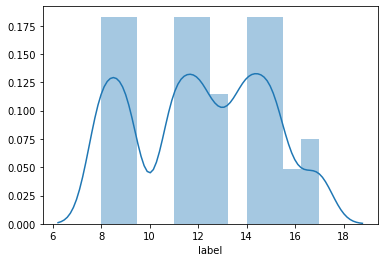

In [132]:
sns.distplot(Y_test)

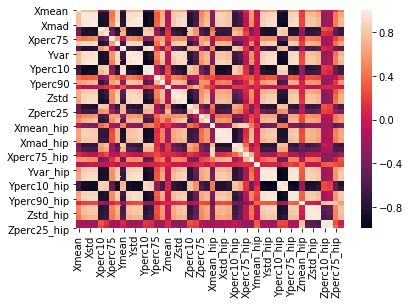

In [162]:
sns.heatmap(X.corr())

In [163]:
columns_to_drop = ['Xstd', 'Ystd', 'Zstd', 'Xmad', 'Ymad', 'Zmad', 'Xstd_hip', 'Ystd_hip', 'Zstd_hip', 'Xmad_hip', 'Ymad_hip', 'Zmad_hip']

In [171]:
X = X.drop(columns = columns_to_drop)
X_test = X_test.drop(columns = columns_to_drop)

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
rf = RandomForestClassifier(max_depth=16, random_state=42)
rf.fit(X, Y)

C:\Users\Andreas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [173]:
rf.score(X_test, Y_test)

0.9730021598272138

In [174]:
Y_test_pred = rf.predict(X_test)
confusion_matrix(Y_test, Y_test_pred)

array([[173,   3,   0,   0,   0],
       [  0, 280,   0,   0,   0],
       [  0,  15, 265,   0,   0],
       [  0,   0,   0,  68,   7],
       [  0,   0,   0,   0, 115]], dtype=int64)

In [175]:
f1_score(Y_test, Y_test_pred, average='weighted')

0.9729946087165764

In [140]:
classes

['OTHER',
 'SWEEPING',
 'VACUUMING',
 'DUSTING',
 'RUBBING',
 'DOWNSTAIRS',
 'WALKING',
 'WALKING_FAST',
 'UPSTAIRS_FAST',
 'UPSTAIRS']

In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
mlp = MLPClassifier(random_state=42, max_iter=2000).fit(X, Y)
mlp.score(X_test, Y_test)
Y_test_pred = mlp.predict(X_test)

In [142]:
confusion_matrix(Y_test, Y_test_pred)

array([[248,  13,   6,  11,   0,   0,   0,   0,   2],
       [ 33, 116,  84,  48,   0,   0,   0,   0,   0],
       [ 48,  23, 113,  76,  18,   0,   0,   0,   2],
       [102,  35,  45,  96,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0, 176,   0,   0,   0,   0],
       [  0,   0,   2,   0,   0, 261,  17,   0,   0],
       [  0,   0,   0,   0,   0,   2, 278,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,  53,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0, 115]], dtype=int64)

In [143]:
f1_score(Y_test, Y_test_pred, average='weighted')

0.699110662612771

In [144]:
grouped = []
grouped_y = []
i = 0
while i < len(X)-20:
        group = X[i:i+20]
        group_y = Y[i:i+20]
        if (all(group_y)):
            x = [x for x in group.values]
            xx = np.array(x)
            grouped.append(xx.flatten())
            grouped_y.append(group_y)
            print(group_y)
        i+=20
pd.DataFrame(grouped)
pd.DataFrame(grouped_y)

9228    8.0
9229    8.0
9230    8.0
9231    8.0
9232    8.0
9233    8.0
9234    8.0
9235    8.0
9236    8.0
9237    8.0
9238    8.0
9239    8.0
9240    8.0
9241    8.0
9242    8.0
9243    8.0
9244    8.0
9245    8.0
9246    8.0
9247    8.0
Name: label, dtype: float64
9248    8.0
9249    8.0
9250    8.0
9251    8.0
9252    8.0
9253    8.0
9254    8.0
9255    8.0
9256    8.0
9257    8.0
9258    8.0
9259    8.0
9260    8.0
9261    8.0
9262    8.0
9263    8.0
9264    8.0
9265    8.0
9266    8.0
9267    8.0
Name: label, dtype: float64
9268    8.0
9269    8.0
9270    8.0
9271    8.0
9272    8.0
9273    8.0
9274    8.0
9275    8.0
9276    8.0
9277    8.0
9278    8.0
9279    8.0
9280    8.0
9281    8.0
9282    8.0
9283    8.0
9284    8.0
9285    8.0
9286    8.0
9287    8.0
Name: label, dtype: float64
9288    8.0
9289    8.0
9290    8.0
9291    8.0
9292    8.0
9293    8.0
9294    8.0
9295    8.0
9296    8.0
9297    8.0
9298    8.0
9299    8.0
9300    8.0
9301    8.0
9302    8.0
9303    8.0
9304

13319    11.0
13320    11.0
13321    11.0
13322    11.0
13323    11.0
13324    11.0
13325    11.0
13326    11.0
13327    11.0
13328    11.0
13329    11.0
13330    11.0
13331    11.0
13332    11.0
13333    11.0
13334    11.0
13335    11.0
13336    11.0
13337    11.0
13338    11.0
Name: label, dtype: float64
13339    11.0
13340    11.0
13341    11.0
13342    11.0
13343    11.0
13344    11.0
13345    11.0
13346    11.0
13347    11.0
13348    11.0
13349    11.0
13350    11.0
13351    11.0
13352    11.0
13353    11.0
13354    11.0
13355    11.0
13356    11.0
13357    11.0
13358    11.0
Name: label, dtype: float64
13359    11.0
13360    11.0
13361    11.0
13362    11.0
13363    11.0
13364    11.0
13365    11.0
13366    11.0
13367    11.0
13368    11.0
13369    11.0
13370    11.0
13371    11.0
13372    11.0
13373    11.0
13374    11.0
13375    11.0
13376    11.0
13377    11.0
13378    11.0
Name: label, dtype: float64
13379    11.0
13380    11.0
13381    11.0
13382    11.0
13383    11.0
13384 

Name: label, dtype: float64
18329    14.0
18330    14.0
18331    14.0
18332    14.0
18333    14.0
18334    14.0
18335    14.0
18336    14.0
18337    14.0
18338    14.0
18339    14.0
18340    14.0
18341    14.0
18342    14.0
18343    14.0
18344    14.0
18345    14.0
18346    14.0
18347    14.0
18348    14.0
Name: label, dtype: float64
18349    14.0
18350    14.0
18351    14.0
18352    14.0
18353    14.0
18354    14.0
18355    14.0
18356    14.0
18357    14.0
18358    14.0
18359    14.0
18360    14.0
18361    14.0
18362    14.0
18363    14.0
18364    14.0
18365    14.0
18366    14.0
18367    14.0
18368    14.0
Name: label, dtype: float64
18369    14.0
18370    14.0
18371    14.0
18372    14.0
18373    14.0
18374    14.0
18375    14.0
18376    14.0
18377    14.0
18378    14.0
18379    14.0
18380    14.0
18381    14.0
18382    14.0
18383    14.0
18384    14.0
18385    14.0
18386    14.0
18387    14.0
18388    14.0
Name: label, dtype: float64
18389    14.0
18390    14.0
18391    14.0
18392 

21920    17.0
21921    17.0
21922    17.0
21923    17.0
21924    17.0
21925    17.0
21926    17.0
21927    17.0
21928    17.0
21929    17.0
21930    17.0
21931    17.0
21932    17.0
21933    17.0
21934    17.0
21935    17.0
21936    17.0
21937    17.0
21938    17.0
21939    17.0
Name: label, dtype: float64
21940    17.0
21941    17.0
21942    17.0
21943    17.0
21944    17.0
21945    17.0
21946    17.0
21947    17.0
21948    17.0
21949    17.0
21950    17.0
21951    17.0
21952    17.0
21953    17.0
21954    17.0
21955    17.0
21956    17.0
21957    17.0
21958    17.0
21959    17.0
Name: label, dtype: float64
21960    17.0
21961    17.0
21962    17.0
21963    17.0
21964    17.0
21965    17.0
21966    17.0
21967    17.0
21968    17.0
21969    17.0
21970    17.0
21971    17.0
21972    17.0
21973    17.0
21974    17.0
21975    17.0
21976    17.0
21977    17.0
21978    17.0
21979    17.0
Name: label, dtype: float64
21980    17.0
21981    17.0
21982    17.0
21983    17.0
21984    17.0
21985 

,9228,9229,9230,9231,9232,9233,9234,9235,9236,9237,...,22110,22111,22112,22113,22114,22115,22116,22117,22118,22119
label,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
len(X)

6540